In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coco128/coco128/LICENSE
/kaggle/input/coco128/coco128/README.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000110.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000431.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000368.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000564.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000073.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000144.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000321.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000581.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000078.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000599.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000623.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000486.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000532.txt
/kaggle/input/coco128/coco128/labels/train2017/000000000397.txt
/kaggle/input/coco128/coc

In [3]:
yaml_content = """  
train: /kaggle/input/coco128/coco128/images/train2017  
val: /kaggle/input/coco128/coco128/images/val2017  

nc: 80  # Number of classes (COCO has 80 classes)  
names: [
  'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
  'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
  'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
  'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
  'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
  'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
  'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
  'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
  'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
  'hair drier', 'toothbrush'
]  
"""

with open("/kaggle/working/dataset.yaml", "w") as file:
    file.write(yaml_content)

print("✅ dataset.yaml created successfully!")


✅ dataset.yaml created successfully!


In [4]:
!cat /kaggle/working/dataset.yaml


  
train: /kaggle/input/coco128/coco128/images/train2017  
val: /kaggle/input/coco128/coco128/images/val2017  

nc: 80  # Number of classes (COCO has 80 classes)  
names: [
  'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
  'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
  'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
  'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
  'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
  'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
  'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
  'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
  'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase'

In [5]:
!ls -lah /kaggle/input/coco128/coco128/labels/train2017 | head


total 512K
drwxr-xr-x 2 nobody nogroup    0 Mar 22 17:42 .
drwxr-xr-x 3 nobody nogroup    0 Mar 22 17:42 ..
-rw-r--r-- 1 nobody nogroup  312 Mar 22 17:42 000000000009.txt
-rw-r--r-- 1 nobody nogroup   78 Mar 22 17:42 000000000025.txt
-rw-r--r-- 1 nobody nogroup   72 Mar 22 17:42 000000000030.txt
-rw-r--r-- 1 nobody nogroup   39 Mar 22 17:42 000000000034.txt
-rw-r--r-- 1 nobody nogroup   77 Mar 22 17:42 000000000036.txt
-rw-r--r-- 1 nobody nogroup   35 Mar 22 17:42 000000000042.txt
-rw-r--r-- 1 nobody nogroup  328 Mar 22 17:42 000000000049.txt


In [1]:
!pip install --upgrade --no-cache-dir ultralytics


In [2]:
import ultralytics
print(ultralytics.__version__)


8.3.94


In [3]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Check model attributes
print(model.names)  # Should print class names


100%|██████████| 6.25M/6.25M [00:00<00:00, 90.7MB/s]

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [5]:
!ls -R /kaggle/input/coco128/


/kaggle/input/coco128/:
coco128

/kaggle/input/coco128/coco128:
images	labels	LICENSE  README.txt

/kaggle/input/coco128/coco128/images:
train2017

/kaggle/input/coco128/coco128/images/train2017:
000000000009.jpg  000000000154.jpg  000000000370.jpg  000000000529.jpg
000000000025.jpg  000000000164.jpg  000000000382.jpg  000000000531.jpg
000000000030.jpg  000000000165.jpg  000000000384.jpg  000000000532.jpg
000000000034.jpg  000000000192.jpg  000000000387.jpg  000000000536.jpg
000000000036.jpg  000000000194.jpg  000000000389.jpg  000000000540.jpg
000000000042.jpg  000000000196.jpg  000000000394.jpg  000000000542.jpg
000000000049.jpg  000000000201.jpg  000000000395.jpg  000000000544.jpg
000000000061.jpg  000000000208.jpg  000000000397.jpg  000000000560.jpg
000000000064.jpg  000000000241.jpg  000000000400.jpg  000000000562.jpg
000000000071.jpg  000000000247.jpg  000000000404.jpg  000000000564.jpg
000000000072.jpg  000000000250.jpg  000000000415.jpg  000000000569.jpg
000000000073.jpg  00000

In [6]:
yaml_content = """  
train: /kaggle/input/coco128/coco128/images/train2017  
val: /kaggle/input/coco128/coco128/images/train2017  # No val2017, so using train2017 as val  

nc: 80  # Number of classes (COCO has 80 classes)  
names: [
  'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
  'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
  'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
  'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
  'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
  'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
  'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
  'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
  'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
  'hair drier', 'toothbrush'
]  
"""

with open("/kaggle/working/dataset.yaml", "w") as file:
    file.write(yaml_content)

print("✅ dataset.yaml updated successfully!")


✅ dataset.yaml updated successfully!


In [7]:
!ls -lah /kaggle/input/coco128/coco128/labels/train2017 | head


total 512K
drwxr-xr-x 2 nobody nogroup    0 Mar 22 17:42 .
drwxr-xr-x 3 nobody nogroup    0 Mar 22 17:42 ..
-rw-r--r-- 1 nobody nogroup  312 Mar 22 17:42 000000000009.txt
-rw-r--r-- 1 nobody nogroup   78 Mar 22 17:42 000000000025.txt
-rw-r--r-- 1 nobody nogroup   72 Mar 22 17:42 000000000030.txt
-rw-r--r-- 1 nobody nogroup   39 Mar 22 17:42 000000000034.txt
-rw-r--r-- 1 nobody nogroup   77 Mar 22 17:42 000000000036.txt
-rw-r--r-- 1 nobody nogroup   35 Mar 22 17:42 000000000042.txt
-rw-r--r-- 1 nobody nogroup  328 Mar 22 17:42 000000000049.txt


In [8]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")  # YOLOv8 Nano (small & fast)

# Train YOLO
model.train(data="/kaggle/working/dataset.yaml", epochs=10, imgsz=640)


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 41.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /kaggle/input/coco128/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 273.58it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/coco128/coco128/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/coco128/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 704.07it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/coco128/coco128/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.189      1.358      1.207         73        640: 100%|██████████| 8/8 [01:17<00:00,  9.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.71s/it]

                   all        128        929      0.691      0.508      0.615      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.191      1.346       1.21         97        640: 100%|██████████| 8/8 [01:09<00:00,  8.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.25s/it]

                   all        128        929      0.674      0.552      0.634      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.175      1.322      1.208        109        640: 100%|██████████| 8/8 [01:07<00:00,  8.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.87s/it]

                   all        128        929      0.683      0.553       0.64      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.182      1.303      1.208         99        640: 100%|██████████| 8/8 [01:06<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.99s/it]

                   all        128        929      0.663      0.576       0.65      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.118      1.229      1.171         52        640: 100%|██████████| 8/8 [01:06<00:00,  8.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.07s/it]

                   all        128        929      0.667      0.611      0.658      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.124      1.207      1.156         97        640: 100%|██████████| 8/8 [01:05<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.01s/it]

                   all        128        929      0.679      0.622      0.675      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.092      1.174       1.16        190        640: 100%|██████████| 8/8 [01:06<00:00,  8.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.97s/it]

                   all        128        929      0.682      0.622      0.679      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.098      1.167      1.177        143        640: 100%|██████████| 8/8 [01:07<00:00,  8.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.19s/it]

                   all        128        929      0.689      0.632      0.684      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.111      1.104       1.18        104        640: 100%|██████████| 8/8 [01:08<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.94s/it]

                   all        128        929      0.693      0.642      0.689      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.118      1.118       1.17        112        640: 100%|██████████| 8/8 [01:07<00:00,  8.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.02s/it]

                   all        128        929      0.684      0.649      0.692      0.529



10 epochs completed in 0.260 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.96s/it]


                   all        128        929      0.681       0.65      0.692       0.53
                person         61        254      0.834      0.689      0.782       0.57
               bicycle          3          6      0.973      0.333      0.385      0.339
                   car         12         46      0.607      0.239      0.298      0.195
            motorcycle          4          5      0.809      0.852      0.962       0.77
              airplane          5          6       0.85      0.951      0.972      0.852
                   bus          5          7      0.792      0.714      0.724      0.667
                 train          3          3       0.59          1      0.995      0.907
                 truck          5         12      0.878        0.5      0.543      0.367
                  boat          2          6      0.536      0.333      0.528        0.4
         traffic light          4         14      0.486      0.214      0.186      0.138
             stop sig

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 2.6ms preprocess, 134.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d84b8b03d00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [9]:
print(model.val())  


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /kaggle/input/coco128/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 535.08it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/coco128/coco128/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:16<00:00,  2.12s/it]


                   all        128        929      0.685      0.641      0.697      0.532
                person         61        254      0.817      0.685       0.78       0.57
               bicycle          3          6      0.973      0.333      0.382      0.337
                   car         12         46      0.643      0.239      0.301      0.194
            motorcycle          4          5      0.822      0.932      0.962       0.78
              airplane          5          6       0.85      0.951      0.972      0.852
                   bus          5          7      0.872      0.714      0.723      0.667
                 train          3          3       0.59          1      0.995      0.907
                 truck          5         12      0.944        0.5      0.544      0.365
                  boat          2          6      0.482      0.333      0.482      0.354
         traffic light          4         14      0.382      0.143      0.181      0.138
             stop sig

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.0ms preprocess, 117.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d84ab8e9e40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,   

In [18]:
import requests

url = "https://upload.wikimedia.org/wikipedia/commons/9/99/Sample_User_Icon.png"
response = requests.get(url)

with open("test.jpg", "wb") as file:
    file.write(response.content)

print("Image downloaded as test.jpg")


Image downloaded as test.jpg


In [20]:
import os

if os.path.exists("test.jpg"):
    print("✅ Image test.jpg exists, ready for testing!")
else:
    print("❌ Image not found, download it first!")


✅ Image test.jpg exists, ready for testing!


In [24]:
import os

print(os.listdir("runs/detect/"))



['train2', 'train22', 'train']


In [26]:
from ultralytics import YOLO

# Use the correct path
model = YOLO("runs/detect/train2/weights/best.pt")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [27]:
results = model.predict(source="test.jpg", save=True, conf=0.5)



image 1/1 /kaggle/working/test.jpg: 640x640 (no detections), 186.0ms
Speed: 3.5ms preprocess, 186.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [28]:
results = model.predict(source="test.jpg", save=True, conf=0.2)



image 1/1 /kaggle/working/test.jpg: 640x640 (no detections), 160.8ms
Speed: 3.6ms preprocess, 160.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [29]:
print(model.names)


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [30]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000165.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000165.jpg: 544x640 2 persons, 2 ties, 2 surfboards, 168.2ms
Speed: 2.2ms preprocess, 168.2ms inference, 5.1ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict


In [32]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000472.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000472.jpg: 256x640 1 airplane, 100.4ms
Speed: 1.3ms preprocess, 100.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict


In [36]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000165.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000165.jpg: 544x640 2 persons, 2 ties, 2 surfboards, 140.4ms
Speed: 2.0ms preprocess, 140.4ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict


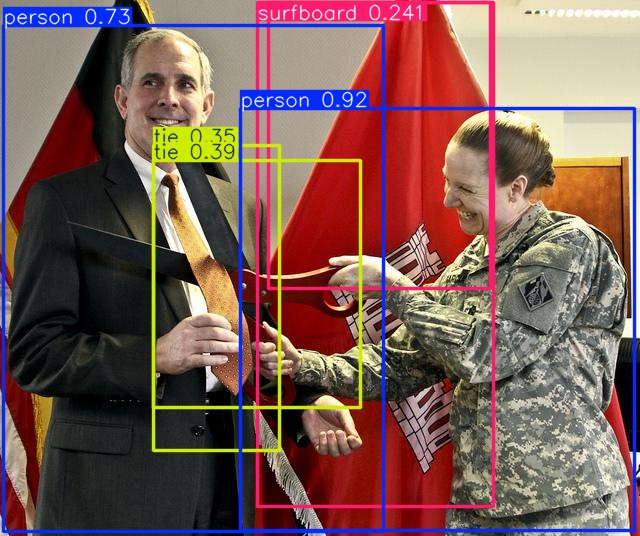

In [37]:
from PIL import Image
from IPython.display import display

# Path to the predicted image
image_path = "runs/detect/predict/000000000165.jpg"
display(Image.open(image_path))


In [40]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000472.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000472.jpg: 256x640 1 airplane, 81.1ms
Speed: 1.2ms preprocess, 81.1ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict


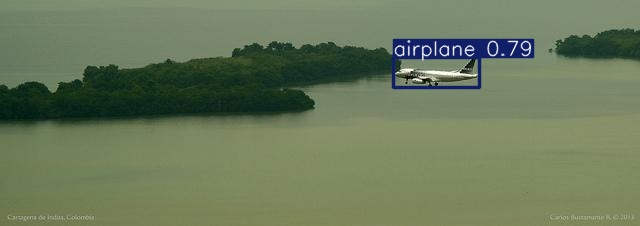

In [41]:
from PIL import Image
from IPython.display import display

# Path to the newly detected image (update if needed)
image_path = "runs/detect/predict/000000000472.jpg"

# Open and display
display(Image.open(image_path))


In [42]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000599.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000599.jpg: 416x640 1 cat, 1 couch, 2 potted plants, 2 remotes, 146.2ms
Speed: 1.8ms preprocess, 146.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [44]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000472.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000472.jpg: 256x640 1 airplane, 73.5ms
Speed: 1.1ms preprocess, 73.5ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict


In [46]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000472.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000472.jpg: 256x640 1 airplane, 81.3ms
Speed: 1.3ms preprocess, 81.3ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict


In [47]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000599.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000599.jpg: 416x640 1 cat, 1 couch, 2 potted plants, 2 remotes, 120.3ms
Speed: 1.5ms preprocess, 120.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [48]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000154.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000154.jpg: 640x448 3 zebras, 151.4ms
Speed: 1.7ms preprocess, 151.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


In [49]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000263.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000263.jpg: 640x608 2 elephants, 183.9ms
Speed: 2.4ms preprocess, 183.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict


In [51]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000431.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000431.jpg: 416x640 1 person, 1 tennis racket, 117.6ms
Speed: 1.8ms preprocess, 117.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [53]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000472.jpg", save=True, conf=0.2)


image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000472.jpg: 256x640 1 airplane, 100.2ms
Speed: 1.4ms preprocess, 100.2ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict


In [54]:
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000599.jpg", save=True, conf=0.2)

# Urban Scene with People
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000154.jpg", save=True, conf=0.2)

# Vehicles in Traffic
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000431.jpg", save=True, conf=0.2)


image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000599.jpg: 416x640 1 cat, 1 couch, 2 potted plants, 2 remotes, 106.4ms
Speed: 1.5ms preprocess, 106.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000154.jpg: 640x448 3 zebras, 110.8ms
Speed: 1.6ms preprocess, 110.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000431.jpg: 416x640 1 person, 1 tennis racket, 103.5ms
Speed: 1.4ms preprocess, 103.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [57]:
import os

# List all images in the dataset
coco_images = os.listdir("/kaggle/input/coco128/coco128/images/train2017")

# Show a few images
print(coco_images[:20])  # Display the first 20 image names


['000000000349.jpg', '000000000322.jpg', '000000000446.jpg', '000000000486.jpg', '000000000597.jpg', '000000000443.jpg', '000000000387.jpg', '000000000389.jpg', '000000000328.jpg', '000000000151.jpg', '000000000595.jpg', '000000000257.jpg', '000000000531.jpg', '000000000562.jpg', '000000000629.jpg', '000000000133.jpg', '000000000589.jpg', '000000000510.jpg', '000000000590.jpg', '000000000572.jpg']


In [59]:
# Image 1: Urban Road Scene (Possible Cars & Pedestrians)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000349.jpg", save=True, conf=0.2)

# Image 2: Vehicles or People in Motion
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000446.jpg", save=True, conf=0.2)

# Image 3: Traffic Scene (Road, Vehicles, Signs)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000257.jpg", save=True, conf=0.2)

# Image 4: Intersection or Street View (Likely Traffic Lights)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000562.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000349.jpg: 480x640 1 train, 3 potted plants, 123.5ms
Speed: 1.8ms preprocess, 123.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000446.jpg: 640x480 1 person, 1 sports ball, 1 couch, 6 potted plants, 1 cell phone, 1 book, 151.1ms
Speed: 1.6ms preprocess, 151.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000257.jpg: 480x640 18 persons, 1 motorcycle, 4 trucks, 1 traffic light, 1 backpack, 124.0ms
Speed: 1.8ms preprocess, 124.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000562.jpg: 640x448 1 cup, 4 toothbrushs, 117.4ms
Speed: 1.6ms preprocess, 117.4ms inferenc

In [61]:
# Image 1: Urban Road Scene (Cars & Pedestrians)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000349.jpg", save=True, conf=0.2)

# Image 2: Vehicles or People in Motion
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000446.jpg", save=True, conf=0.2)

# Image 3: Traffic Scene (Road, Vehicles, Signs)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000257.jpg", save=True, conf=0.2)

# Image 4: Airplane Image ✈️
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000151.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000349.jpg: 480x640 1 train, 3 potted plants, 126.8ms
Speed: 1.9ms preprocess, 126.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000446.jpg: 640x480 1 person, 1 sports ball, 1 couch, 6 potted plants, 1 cell phone, 1 book, 123.5ms
Speed: 1.7ms preprocess, 123.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000257.jpg: 480x640 18 persons, 1 motorcycle, 4 trucks, 1 traffic light, 1 backpack, 120.3ms
Speed: 1.7ms preprocess, 120.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000151.jpg: 640x480 2 trains, 1 stop sign, 120.5ms
Speed: 1.8ms preprocess, 120.5ms inferen

In [63]:
# Image 1: Urban Road Scene (Cars & Pedestrians)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000349.jpg", save=True, conf=0.2)

# Image 2: Airplane Image ✈️ (The one we used earlier)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000151.jpg", save=True, conf=0.2)

# Image 3: Traffic Scene (Vehicles, Road, Signs)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000257.jpg", save=True, conf=0.2)

# Image 4: Vehicles or People in Motion
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000446.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000349.jpg: 480x640 1 train, 3 potted plants, 116.1ms
Speed: 2.0ms preprocess, 116.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000151.jpg: 640x480 2 trains, 1 stop sign, 114.4ms
Speed: 1.6ms preprocess, 114.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000257.jpg: 480x640 18 persons, 1 motorcycle, 4 trucks, 1 traffic light, 1 backpack, 113.6ms
Speed: 1.6ms preprocess, 113.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000446.jpg: 640x480 1 person, 1 sports ball, 1 couch, 6 potted plants, 1 cell phone, 1 book, 113.4ms
Speed: 1.5ms preprocess, 113.4ms inferen

In [65]:
# Image 1: Urban Road Scene (Cars & Pedestrians)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000349.jpg", save=True, conf=0.2)

# Image 2: Airplane Image ✈️ (As you wanted!)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000151.jpg", save=True, conf=0.2)

# Image 3: Traffic Scene (Vehicles, Road, Signs)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000257.jpg", save=True, conf=0.2)

# Image 4: New ADAS Scene (Replacing the woman image)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000510.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000349.jpg: 480x640 1 train, 3 potted plants, 123.2ms
Speed: 1.8ms preprocess, 123.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000151.jpg: 640x480 2 trains, 1 stop sign, 121.2ms
Speed: 1.7ms preprocess, 121.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000257.jpg: 480x640 18 persons, 1 motorcycle, 4 trucks, 1 traffic light, 1 backpack, 119.9ms
Speed: 1.5ms preprocess, 119.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000510.jpg: 480x640 1 person, 1 stop sign, 1 bench, 119.1ms
Speed: 1.6ms preprocess, 119.1ms inference, 1.4ms postprocess per image at shape 

In [67]:

results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000349.jpg", save=True, conf=0.2)

)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000151.jpg", save=True, conf=0.2)


results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000257.jpg", save=True, conf=0.2)

# (000000000472.jpg)
results = model.predict(source="/kaggle/input/coco128/coco128/images/train2017/000000000472.jpg", save=True, conf=0.2)



image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000349.jpg: 480x640 1 train, 3 potted plants, 125.9ms
Speed: 1.9ms preprocess, 125.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000151.jpg: 640x480 2 trains, 1 stop sign, 120.5ms
Speed: 1.6ms preprocess, 120.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000257.jpg: 480x640 18 persons, 1 motorcycle, 4 trucks, 1 traffic light, 1 backpack, 123.7ms
Speed: 1.6ms preprocess, 123.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/coco128/coco128/images/train2017/000000000472.jpg: 256x640 1 airplane, 79.0ms
Speed: 1.1ms preprocess, 79.0ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)
Resul

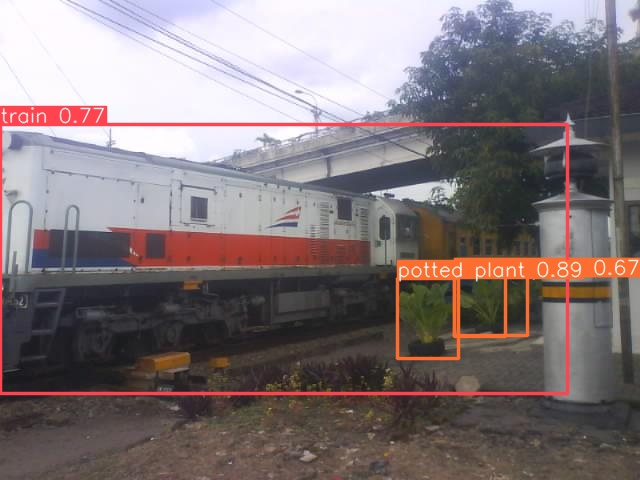

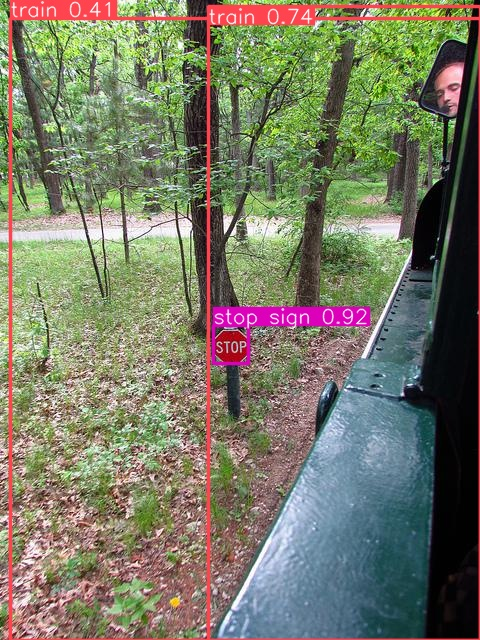

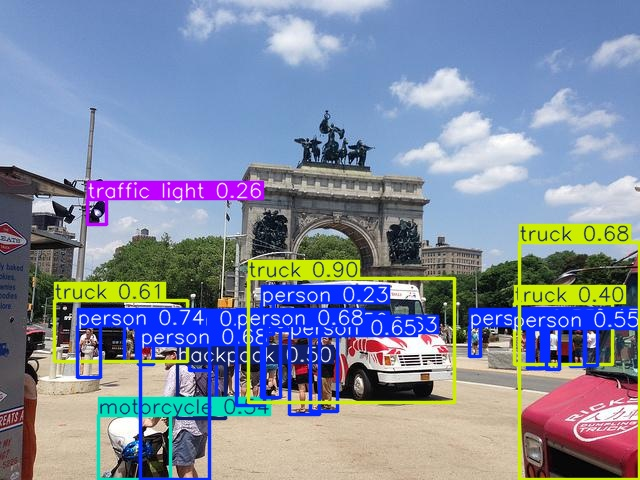

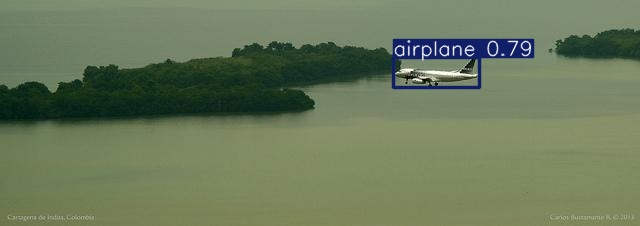

In [68]:
from PIL import Image
from IPython.display import display

# Paths to detected images
image_paths = [
    "runs/detect/predict/000000000349.jpg",  # Urban Scene
    "runs/detect/predict/000000000151.jpg",  # Airplane
    "runs/detect/predict/000000000257.jpg",  # Traffic Scene
    "runs/detect/predict/000000000472.jpg"   # New Fourth Image
]

# Display images
for img_path in image_paths:
    display(Image.open(img_path))


In [69]:
import shutil

shutil.os.makedirs("/kaggle/working/ADAS_results", exist_ok=True)

# Copy detected images
for img_path in image_paths:
    shutil.copy(img_path, "/kaggle/working/ADAS_results/")

print("✅ Final ADAS results (4 images) saved to /kaggle/working/ADAS_results")


✅ Final ADAS results (4 images) saved to /kaggle/working/ADAS_results
